# Dependencies

In [2]:
from manim import *
import numpy as np
import math

from manim.mobject.graphing.scale import LogBase

In [3]:
def remove_invisible_chars(mobject: SVGMobject) -> SVGMobject:
    """Function to remove unwanted invisible characters from some mobjects.

    Parameters
    ----------
    mobject
        Any SVGMobject from which we want to remove unwanted invisible characters.

    Returns
    -------
    :class:`~.SVGMobject`
        The SVGMobject without unwanted invisible characters.
    """
    # TODO: Refactor needed
    iscode = False
    if mobject.__class__.__name__ == "Text":
        mobject = mobject[:]
    elif mobject.__class__.__name__ == "Code":
        iscode = True
        code = mobject
        mobject = mobject.code
    mobject_without_dots = VGroup()
    if mobject[0].__class__ == VGroup:
        for i in range(len(mobject)):
            mobject_without_dots.add(VGroup())
            mobject_without_dots[i].add(*(k for k in mobject[i] if k.__class__ != Dot))
    else:
        mobject_without_dots.add(*(k for k in mobject if k.__class__ != Dot))
    if iscode:
        code.code = mobject_without_dots
        return code
    return mobject_without_dots

# Motivation

In [5]:
X0 = np.round(np.random.rand(10, 10), 1)
W0 = np.round(np.random.rand(10, 10), 1)
X1 = np.round(X0 @ W0, 1)

In [4]:
%%manim -qk -v WARNING Motivation

class Motivation(Scene):
    def construct(self):
        C = Matrix(X1,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.25)

        A = Matrix(X0,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.25).next_to(C, LEFT)

        B = Matrix(W0,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.25).next_to(C, UP)

        VGroup(A, B, C).move_to(ORIGIN)

        threads = VGroup()
        for i in range(10):
            thread_row = VGroup()
            for j in range(10):
                thread_row.add(Dot(radius=0.05, color=GREEN).move_to(C.get_entries()[i*10+j]))
            threads.add(thread_row)
        
        self.wait(1)
        self.play(Create(threads))
        self.wait(1)
        self.play(Create(A), Create(B), Create(C[1:]))
        self.wait(1)

        self.play(VGroup(C[1:], threads).animate.to_edge(DOWN),
                A.animate.to_edge(DOWN).to_edge(LEFT).shift(0.5*RIGHT),
                B.animate.to_edge(UP))
        C[:1].to_edge(DOWN)
        self.wait(1)

        comment_1 = Tex(r"These matrices are stored \\ in the global memory!").scale(0.75).to_edge(LEFT).shift(2*UP)
        self.play(Write(comment_1))
        self.wait(1)

        A_tile = VGroup()
        B_tile = VGroup()
        threads_tile = VGroup()
        C_tile = VGroup()
        for i in range(5):
            A_tile.add(A.get_entries()[i*10:i*10+5])
            B_tile.add(B.get_entries()[i*10:i*10+5])
            C_tile.add(C.get_entries()[i*10:i*10+5])
            threads_tile.add(threads[i][:5])

        self.play(A_tile.animate.next_to(C, LEFT), B_tile.animate.next_to(C, UP))
        sh_A = VGroup()
        sh_B = VGroup()
        for i in range(5):
            sh_A.add(SurroundingRectangle(A_tile, color=RED))
            sh_B.add(SurroundingRectangle(B_tile, color=RED))
        self.play(Create(sh_A), Create(sh_B))

        comment_2 = Tex(r"Getting data from \\ shared memory \\ is fast").scale(0.75).to_edge(RIGHT)
        self.play(Write(comment_2))

        for i in range(5):
            if i != 4:
                self.play(FadeOut(sh_A[i], target_position=threads_tile), FadeOut(sh_B[i], target_position=threads_tile))
            else:
                self.play(FadeOut(sh_A[i], target_position=threads_tile), 
                        FadeOut(sh_B[i], target_position=threads_tile),
                        FadeOut(A_tile, target_position=threads_tile), 
                        FadeOut(B_tile, target_position=threads_tile))

        A_tile = VGroup()
        B_tile = VGroup()
        for i in range(5):
            A_tile.add(A.get_entries()[i*10+5:i*10+5+5])
        for i in range(5, 10):
            B_tile.add(B.get_entries()[i*10:i*10+5])

        self.play(A_tile.animate.next_to(C, LEFT), B_tile.animate.next_to(C, UP))
        sh_A = VGroup()
        sh_B = VGroup()
        for i in range(5):
            sh_A.add(SurroundingRectangle(A_tile, color=RED))
            sh_B.add(SurroundingRectangle(B_tile, color=RED))
        self.play(Create(sh_A), Create(sh_B))

        for i in range(5):
            if i != 4:
                self.play(FadeOut(sh_A[i], target_position=threads_tile), FadeOut(sh_B[i], target_position=threads_tile))
            else:
                self.play(FadeOut(sh_A[i], target_position=threads_tile), 
                        FadeOut(sh_B[i], target_position=threads_tile),
                        FadeOut(A_tile, target_position=threads_tile), 
                        FadeOut(B_tile, target_position=threads_tile),
                        ReplacementTransform(threads_tile, C_tile))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Traditional Mat Mul

In [5]:
%%manim -qk -v WARNING TraditionalMatMul

class TraditionalMatMul(Scene):
    def construct(self):
        # Matrices
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        matrices = VGroup(A_mat, B_mat, C_mat).scale(0.75).move_to(ORIGIN)

        self.play(Create(A_mat), Create(B_mat), Create(C_mat[1:]))
        self.wait(1)

        threads = VGroup()
        for i in range(4):
            thread_row = VGroup()
            for j in range(4):
                thread_row.add(Dot(radius=0.1, color=GREEN).move_to(C_mat.get_entries()[i*4+j]))
            threads.add(thread_row)
        blocks = VGroup(SurroundingRectangle(VGroup(threads[0][:2], threads[1][:2]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[0][2:], threads[1][2:]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[2][:2], threads[3][:2]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[2][2:], threads[3][2:]), color=RED, buff=0.2))

        self.play(Create(threads), Create(blocks))
        self.wait(1)
        self.play(VGroup(A_mat, B_mat, C_mat[1:], threads, blocks).animate.scale(0.75).move_to(ORIGIN).to_edge(LEFT))
        self.play(FadeOut(blocks, threads[2:], threads[0][2:], threads[1][2:]), 
                threads[0][0].animate.set_color(RED),
                threads[0][1].animate.set_color(GREEN),
                threads[1][0].animate.set_color(BLUE),
                threads[1][1].animate.set_color(YELLOW))
        t00 = Tex(r"Thread[0,0]", color=RED).scale(0.7)
        t01 = Tex(r"Thread[0,1]", color=GREEN).scale(0.7).next_to(t00, RIGHT)
        t10 = Tex(r"Thread[1,0]", color=BLUE).scale(0.7).next_to(t01, RIGHT)
        t11 = Tex(r"Thread[1,1]", color=YELLOW).scale(0.7).next_to(t10, RIGHT)
        thread_texts = VGroup(t00, t01, t10, t11).to_edge(RIGHT).to_edge(UP)
        self.play(Write(thread_texts))
        self.wait(1)

        t00_access = VGroup(Tex(r"$a_{0,0}$").scale(0.6).next_to(t00, DOWN))
        t00_access.add(Tex(r"$b_{0,0}$").scale(0.6).next_to(t00_access[-1], DOWN))
        t00_access.add(Tex(r"$a_{0,1}$").scale(0.6).next_to(t00_access[-1], DOWN))
        t00_access.add(Tex(r"$b_{1,0}$").scale(0.6).next_to(t00_access[-1], DOWN))
        t00_access.add(Tex(r"$a_{0,2}$").scale(0.6).next_to(t00_access[-1], DOWN))
        t00_access.add(Tex(r"$b_{2,0}$").scale(0.6).next_to(t00_access[-1], DOWN))
        t00_access.add(Tex(r"$a_{0,3}$").scale(0.6).next_to(t00_access[-1], DOWN))
        t00_access.add(Tex(r"$b_{3,0}$").scale(0.6).next_to(t00_access[-1], DOWN))
        
        t00_box = VGroup(SurroundingRectangle(A_mat.get_entries()[:4]), SurroundingRectangle(B_mat.get_entries()[::4]))

        self.play(Write(t00_access), Create(t00_box))
        self.wait(1)
        self.play(FadeOut(t00_box))
        self.wait(1)

        t01_access = VGroup(Tex(r"$a_{0,0}$").scale(0.6).next_to(t01, DOWN))
        t01_access.add(Tex(r"$b_{0,1}$").scale(0.6).next_to(t01_access[-1], DOWN))
        t01_access.add(Tex(r"$a_{0,1}$").scale(0.6).next_to(t01_access[-1], DOWN))
        t01_access.add(Tex(r"$b_{1,1}$").scale(0.6).next_to(t01_access[-1], DOWN))
        t01_access.add(Tex(r"$a_{0,2}$").scale(0.6).next_to(t01_access[-1], DOWN))
        t01_access.add(Tex(r"$b_{2,1}$").scale(0.6).next_to(t01_access[-1], DOWN))
        t01_access.add(Tex(r"$a_{0,3}$").scale(0.6).next_to(t01_access[-1], DOWN))
        t01_access.add(Tex(r"$b_{3,1}$").scale(0.6).next_to(t01_access[-1], DOWN))

        t10_access = VGroup(Tex(r"$a_{1,0}$").scale(0.6).next_to(t10, DOWN))
        t10_access.add(Tex(r"$b_{0,0}$").scale(0.6).next_to(t10_access[-1], DOWN))
        t10_access.add(Tex(r"$a_{1,1}$").scale(0.6).next_to(t10_access[-1], DOWN))
        t10_access.add(Tex(r"$b_{1,0}$").scale(0.6).next_to(t10_access[-1], DOWN))
        t10_access.add(Tex(r"$a_{1,2}$").scale(0.6).next_to(t10_access[-1], DOWN))
        t10_access.add(Tex(r"$b_{2,0}$").scale(0.6).next_to(t10_access[-1], DOWN))
        t10_access.add(Tex(r"$a_{1,3}$").scale(0.6).next_to(t10_access[-1], DOWN))
        t10_access.add(Tex(r"$b_{3,0}$").scale(0.6).next_to(t10_access[-1], DOWN))

        t11_access = VGroup(Tex(r"$a_{1,0}$").scale(0.6).next_to(t11, DOWN))
        t11_access.add(Tex(r"$b_{0,1}$").scale(0.6).next_to(t11_access[-1], DOWN))
        t11_access.add(Tex(r"$a_{1,1}$").scale(0.6).next_to(t11_access[-1], DOWN))
        t11_access.add(Tex(r"$b_{1,1}$").scale(0.6).next_to(t11_access[-1], DOWN))
        t11_access.add(Tex(r"$a_{1,2}$").scale(0.6).next_to(t11_access[-1], DOWN))
        t11_access.add(Tex(r"$b_{2,1}$").scale(0.6).next_to(t11_access[-1], DOWN))
        t11_access.add(Tex(r"$a_{1,3}$").scale(0.6).next_to(t11_access[-1], DOWN))
        t11_access.add(Tex(r"$b_{3,1}$").scale(0.6).next_to(t11_access[-1], DOWN))

        self.play(Write(t01_access), Write(t10_access), Write(t11_access))
        self.wait(1)

        point_1 = VGroup(SurroundingRectangle(t00_access[0], buff=0.1, color=PURPLE), SurroundingRectangle(t01_access[0], buff=0.1, color=PURPLE))
        point_2 = VGroup(SurroundingRectangle(t00_access[1], buff=0.1, color=PURPLE_A), SurroundingRectangle(t10_access[1], buff=0.1, color=PURPLE_A))
        point_3 = VGroup(SurroundingRectangle(t00_access[2], buff=0.1, color=PURPLE_B), SurroundingRectangle(t01_access[2], buff=0.1, color=PURPLE_B))
        point_4 = VGroup(SurroundingRectangle(t00_access[3], buff=0.1, color=PURPLE_C), SurroundingRectangle(t10_access[3], buff=0.1, color=PURPLE_C))
        point_5 = Tex(r"And many more!").next_to(VGroup(t00_access, t01_access, t10_access, t11_access), DOWN)
        self.play(Create(point_1))
        self.wait(1)
        self.play(Create(point_2))
        self.wait(1)
        self.play(Create(point_3), Create(point_4), Write(point_5))
        self.wait(1)
        point_6 = Tex("Algorithm is suitable for Shared Memory use...").to_edge(DOWN).shift(0.5*UP)
        self.play(Write(point_6))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Tiled MatMul

## Algorithm

In [8]:
%%manim -qk -v WARNING TiledMatMUlAlgo

class TiledMatMUlAlgo(Scene):
    def construct(self):
        # Matrices
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        matrices = VGroup(A_mat, B_mat, C_mat).scale(0.65).move_to(ORIGIN)
        A_mat.to_edge(LEFT).to_edge(DOWN)
        B_mat.to_edge(UP)
        C_mat.to_edge(DOWN)

        threads = VGroup()
        for i in range(4):
            thread_row = VGroup()
            for j in range(4):
                thread_row.add(Dot(radius=0.1, color=GREEN).move_to(C_mat.get_entries()[i*4+j]))
            threads.add(thread_row)
        
        blocks = VGroup(SurroundingRectangle(VGroup(threads[0][:2], threads[1][:2]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[0][2:], threads[1][2:]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[2][:2], threads[3][:2]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[2][2:], threads[3][2:]), color=RED, buff=0.2))
        
        sh_mem = VGroup(SurroundingRectangle(VGroup(threads[0][:2], threads[1][:2]), color=ORANGE, buff=0.2).next_to(blocks[0], LEFT).shift(0.25*LEFT),
                        SurroundingRectangle(VGroup(threads[0][2:], threads[1][2:]), color=ORANGE, buff=0.2).next_to(blocks[1], RIGHT).shift(0.25*RIGHT),
                        SurroundingRectangle(VGroup(threads[2][:2], threads[3][:2]), color=ORANGE, buff=0.2).next_to(blocks[2], LEFT).shift(0.25*LEFT),
                        SurroundingRectangle(VGroup(threads[2][2:], threads[3][2:]), color=ORANGE, buff=0.2).next_to(blocks[3], RIGHT).shift(0.25*RIGHT),
                        SurroundingRectangle(VGroup(threads[0][:2], threads[1][:2]), color=ORANGE, buff=0.2).next_to(blocks[0], UP).shift(0.25*UP),)
        
        global_mem = VGroup(SurroundingRectangle(A_mat, color=RED_A), 
                            SurroundingRectangle(B_mat, color=RED_A))
        
        self.play(Create(sh_mem[0]))
        self.wait(1)
        comment_1 = Tex(r"Shared Memory is fast!", color=ORANGE).scale(0.75).next_to(sh_mem[0], UP)
        self.play(Create(threads))
        self.wait(1)
        comment_2 = Tex(r"Global Memory is slow but can store \\ a lot of data...", color=RED_A).scale(0.75).next_to(global_mem[1], LEFT)
        self.play(Create(global_mem))
        self.wait(1)
        self.play(Create(VGroup(A_mat, B_mat)), Write(comment_2))
        self.wait(1)
        self.play(Write(comment_1))
        self.wait(1)
        bp = BulletedList("A unique shared memory for each thread block",
                        "Threads in a block can only access its shared memory",
                        "All threads can access the global memory").scale(0.57).next_to(B_mat, LEFT)
        self.play(Write(bp[0]), Create(sh_mem[1:-1]), Create(blocks), FadeOut(comment_1, comment_2))
        self.wait(1)
        arrows = VGroup(Arrow(start=blocks[0].get_center(), end=sh_mem[0].get_center()),
                        Arrow(start=blocks[1].get_center(), end=sh_mem[1].get_center()),
                        Arrow(start=blocks[2].get_center(), end=sh_mem[2].get_center()),
                        Arrow(start=blocks[3].get_center(), end=sh_mem[3].get_center()))
        self.play(Write(bp[1]), Create(arrows))
        self.wait(1)
        self.play(Write(bp[2]))
        self.wait(1)
        tiles = VGroup(SurroundingRectangle(VGroup(A_mat.get_entries()[0:2], A_mat.get_entries()[4:6])),
                        SurroundingRectangle(VGroup(A_mat.get_entries()[2:4], A_mat.get_entries()[6:8])),
                        SurroundingRectangle(VGroup(A_mat.get_entries()[8:10], A_mat.get_entries()[12:14])),
                        SurroundingRectangle(VGroup(A_mat.get_entries()[10:12], A_mat.get_entries()[14:16])), 
                        SurroundingRectangle(VGroup(B_mat.get_entries()[0:2], B_mat.get_entries()[4:6])),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[2:4], B_mat.get_entries()[6:8])),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[8:10], B_mat.get_entries()[12:14])),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[10:12], B_mat.get_entries()[14:16])))

        self.play(FadeOut(global_mem, arrows, bp), Create(tiles))
        self.wait(1)
        self.play(Create(C_mat[1:]))
        self.wait(1)
        self.play(VGroup(A_mat.get_entries()[8:], B_mat.get_entries()[2:4], 
                        B_mat.get_entries()[6:8], B_mat.get_entries()[10:12], 
                        B_mat.get_entries()[14:16],
                        threads[0][2:], threads[1][2:], threads[2:]).animate.set_opacity(0.2),
                FadeOut(blocks[1:], tiles[2:4], tiles[5], tiles[7], sh_mem[1:-1]),
                Create(sh_mem[-1]))
        self.wait(1)

        arrow = CurvedArrow(start_point=tiles[1].get_edge_center(DOWN), end_point=blocks[0].get_edge_center(DOWN))
        comment = Tex(r"Tile shape and block shape must be same!").move_to(arrow)
        self.play(Create(arrow), Write(comment))
        self.wait(1)
        self.play(FadeOut(arrow), FadeOut(comment))
        self.wait(1)
        
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(tiles[0]))
        self.play(VGroup(threads[0][:2], threads[1][:2], A_mat.get_entries()[0:2], A_mat.get_entries()[4:6]).animate.move_to(sh_mem[0]))
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(blocks[0]))
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(tiles[4]))
        self.play(VGroup(threads[0][:2], threads[1][:2], B_mat.get_entries()[0:2], B_mat.get_entries()[4:6]).animate.move_to(sh_mem[-1]))
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(blocks[0]))
        self.wait(1)
        rect1 = SurroundingRectangle(VGroup(threads[0][0], A_mat.get_entries()[0:2]))
        rect2 = SurroundingRectangle(VGroup(threads[0][0], B_mat.get_entries()[0], B_mat.get_entries()[4]))
        self.play(Create(rect1), Create(rect2))
        self.play(ReplacementTransform(VGroup(rect1, rect2), C_mat.get_entries()[0].set_opacity(0.5)))
        rect1 = SurroundingRectangle(VGroup(threads[0][1], A_mat.get_entries()[0:2]))
        rect2 = SurroundingRectangle(VGroup(threads[0][1], B_mat.get_entries()[1], B_mat.get_entries()[5]))
        self.play(Create(rect1), Create(rect2))
        self.play(ReplacementTransform(VGroup(rect1, rect2), C_mat.get_entries()[1].set_opacity(0.5)))
        rect1 = SurroundingRectangle(VGroup(threads[1][0], A_mat.get_entries()[4:6]))
        rect2 = SurroundingRectangle(VGroup(threads[1][0], B_mat.get_entries()[0], B_mat.get_entries()[4]))
        self.play(Create(rect1), Create(rect2))
        self.play(ReplacementTransform(VGroup(rect1, rect2), C_mat.get_entries()[4].set_opacity(0.5)))
        rect1 = SurroundingRectangle(VGroup(threads[1][1], A_mat.get_entries()[4:6]))
        rect2 = SurroundingRectangle(VGroup(threads[1][1], B_mat.get_entries()[1], B_mat.get_entries()[5]))
        self.play(Create(rect1), Create(rect2))
        self.play(ReplacementTransform(VGroup(rect1, rect2), C_mat.get_entries()[5].set_opacity(0.5)))
        self.wait(1)
        self.play(FadeOut(A_mat.get_entries()[0:2], A_mat.get_entries()[4:6], B_mat.get_entries()[0:2], B_mat.get_entries()[4:6]))
        self.wait(1)

        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(tiles[1]))
        self.play(VGroup(threads[0][:2], threads[1][:2], A_mat.get_entries()[2:4], A_mat.get_entries()[6:8]).animate.move_to(sh_mem[0]))
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(blocks[0]))
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(tiles[-2]))
        self.play(VGroup(threads[0][:2], threads[1][:2], B_mat.get_entries()[8:10], B_mat.get_entries()[12:14]).animate.move_to(sh_mem[-1]))
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(blocks[0]))
        self.wait(1)
        rect1 = SurroundingRectangle(VGroup(threads[0][0], A_mat.get_entries()[2:4]))
        rect2 = SurroundingRectangle(VGroup(threads[0][0], B_mat.get_entries()[8], B_mat.get_entries()[12]))
        self.play(Create(rect1), Create(rect2))
        self.play(FadeOut(VGroup(rect1, rect2, threads[0][0])), C_mat.get_entries()[0].animate.set_opacity(1))
        rect1 = SurroundingRectangle(VGroup(threads[0][1], A_mat.get_entries()[2:4]))
        rect2 = SurroundingRectangle(VGroup(threads[0][1], B_mat.get_entries()[9], B_mat.get_entries()[13]))
        self.play(Create(rect1), Create(rect2))
        self.play(FadeOut(VGroup(rect1, rect2, threads[0][1])), C_mat.get_entries()[1].animate.set_opacity(1))
        rect1 = SurroundingRectangle(VGroup(threads[1][0], A_mat.get_entries()[6:8]))
        rect2 = SurroundingRectangle(VGroup(threads[1][0], B_mat.get_entries()[8], B_mat.get_entries()[12]))
        self.play(Create(rect1), Create(rect2))
        self.play(FadeOut(VGroup(rect1, rect2, threads[1][0])), C_mat.get_entries()[4].animate.set_opacity(1))
        rect1 = SurroundingRectangle(VGroup(threads[1][1], A_mat.get_entries()[6:8]))
        rect2 = SurroundingRectangle(VGroup(threads[1][1], B_mat.get_entries()[9], B_mat.get_entries()[13]))
        self.play(Create(rect1), Create(rect2))
        self.play(FadeOut(VGroup(rect1, rect2, threads[1][1])), C_mat.get_entries()[5].animate.set_opacity(1))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        title = Title("Global Memory vs Shared Memory")
        divider = Line(start=3.25*UP, end=3.1*DOWN).next_to(title, DOWN).shift(0.25*UP)
        self.play(Write(title), Create(divider))
        self.wait(1)

        t00 = Tex(r"Thread[0,0]", color=RED).scale(0.5)
        t01 = Tex(r"Thread[0,1]", color=GREEN).scale(0.5).next_to(t00, RIGHT)
        t10 = Tex(r"Thread[1,0]", color=BLUE).scale(0.5).next_to(t01, RIGHT)
        t11 = Tex(r"Thread[1,1]", color=YELLOW).scale(0.5).next_to(t10, RIGHT)
        thread_texts = VGroup(t00, t01, t10, t11).next_to(title, DOWN).to_edge(LEFT)

        t00_access = VGroup(Tex(r"$a_{0,0}$").scale(0.6).next_to(t00, DOWN))
        t00_access.add(Tex(r"$b_{0,0}$").scale(0.6).next_to(t00_access[-1], DOWN))
        t00_access.add(Tex(r"$a_{0,1}$").scale(0.6).next_to(t00_access[-1], DOWN))
        t00_access.add(Tex(r"$b_{1,0}$").scale(0.6).next_to(t00_access[-1], DOWN))
        t00_access.add(Tex(r"$a_{0,2}$").scale(0.6).next_to(t00_access[-1], DOWN))
        t00_access.add(Tex(r"$b_{2,0}$").scale(0.6).next_to(t00_access[-1], DOWN))
        t00_access.add(Tex(r"$a_{0,3}$").scale(0.6).next_to(t00_access[-1], DOWN))
        t00_access.add(Tex(r"$b_{3,0}$").scale(0.6).next_to(t00_access[-1], DOWN))

        t01_access = VGroup(Tex(r"$a_{0,0}$").scale(0.6).next_to(t01, DOWN))
        t01_access.add(Tex(r"$b_{0,1}$").scale(0.6).next_to(t01_access[-1], DOWN))
        t01_access.add(Tex(r"$a_{0,1}$").scale(0.6).next_to(t01_access[-1], DOWN))
        t01_access.add(Tex(r"$b_{1,1}$").scale(0.6).next_to(t01_access[-1], DOWN))
        t01_access.add(Tex(r"$a_{0,2}$").scale(0.6).next_to(t01_access[-1], DOWN))
        t01_access.add(Tex(r"$b_{2,1}$").scale(0.6).next_to(t01_access[-1], DOWN))
        t01_access.add(Tex(r"$a_{0,3}$").scale(0.6).next_to(t01_access[-1], DOWN))
        t01_access.add(Tex(r"$b_{3,1}$").scale(0.6).next_to(t01_access[-1], DOWN))

        t10_access = VGroup(Tex(r"$a_{1,0}$").scale(0.6).next_to(t10, DOWN))
        t10_access.add(Tex(r"$b_{0,0}$").scale(0.6).next_to(t10_access[-1], DOWN))
        t10_access.add(Tex(r"$a_{1,1}$").scale(0.6).next_to(t10_access[-1], DOWN))
        t10_access.add(Tex(r"$b_{1,0}$").scale(0.6).next_to(t10_access[-1], DOWN))
        t10_access.add(Tex(r"$a_{1,2}$").scale(0.6).next_to(t10_access[-1], DOWN))
        t10_access.add(Tex(r"$b_{2,0}$").scale(0.6).next_to(t10_access[-1], DOWN))
        t10_access.add(Tex(r"$a_{1,3}$").scale(0.6).next_to(t10_access[-1], DOWN))
        t10_access.add(Tex(r"$b_{3,0}$").scale(0.6).next_to(t10_access[-1], DOWN))

        t11_access = VGroup(Tex(r"$a_{1,0}$").scale(0.6).next_to(t11, DOWN))
        t11_access.add(Tex(r"$b_{0,1}$").scale(0.6).next_to(t11_access[-1], DOWN))
        t11_access.add(Tex(r"$a_{1,1}$").scale(0.6).next_to(t11_access[-1], DOWN))
        t11_access.add(Tex(r"$b_{1,1}$").scale(0.6).next_to(t11_access[-1], DOWN))
        t11_access.add(Tex(r"$a_{1,2}$").scale(0.6).next_to(t11_access[-1], DOWN))
        t11_access.add(Tex(r"$b_{2,1}$").scale(0.6).next_to(t11_access[-1], DOWN))
        t11_access.add(Tex(r"$a_{1,3}$").scale(0.6).next_to(t11_access[-1], DOWN))
        t11_access.add(Tex(r"$b_{3,1}$").scale(0.6).next_to(t11_access[-1], DOWN))

        self.play(Write(thread_texts), Write(t00_access), Write(t01_access), Write(t10_access), Write(t11_access))
        self.wait(1)

        t00_ = Tex(r"Thread[0,0]", color=RED).scale(0.5)
        t01_ = Tex(r"Thread[0,1]", color=GREEN).scale(0.5).next_to(t00_, RIGHT)
        t10_ = Tex(r"Thread[1,0]", color=BLUE).scale(0.5).next_to(t01_, RIGHT)
        t11_ = Tex(r"Thread[1,1]", color=YELLOW).scale(0.5).next_to(t10_, RIGHT)
        thread_texts_ = VGroup(t00_, t01_, t10_, t11_).next_to(title, DOWN).to_edge(RIGHT)

        t00_access_ = VGroup(Tex(r"$a_{0,0}$").scale(0.6).next_to(t00_, DOWN))
        t00_access_.add(Tex(r"$b_{0,0}$").scale(0.6).next_to(t00_access_[-1], DOWN))
        t00_access_.add(Tex(r"$a_{0,2}$").scale(0.6).next_to(t00_access_[-1], DOWN))
        t00_access_.add(Tex(r"$b_{2,0}$").scale(0.6).next_to(t00_access_[-1], DOWN))

        t01_access_ = VGroup(Tex(r"$a_{0,1}$").scale(0.6).next_to(t01_, DOWN))
        t01_access_.add(Tex(r"$b_{0,1}$").scale(0.6).next_to(t01_access_[-1], DOWN))
        t01_access_.add(Tex(r"$a_{0,3}$").scale(0.6).next_to(t01_access_[-1], DOWN))
        t01_access_.add(Tex(r"$b_{2,1}$").scale(0.6).next_to(t01_access_[-1], DOWN))

        t10_access_ = VGroup(Tex(r"$a_{1,0}$").scale(0.6).next_to(t10_, DOWN))
        t10_access_.add(Tex(r"$b_{1,0}$").scale(0.6).next_to(t10_access_[-1], DOWN))
        t10_access_.add(Tex(r"$a_{1,2}$").scale(0.6).next_to(t10_access_[-1], DOWN))
        t10_access_.add(Tex(r"$b_{3,0}$").scale(0.6).next_to(t10_access_[-1], DOWN))

        t11_access_ = VGroup(Tex(r"$a_{1,1}$").scale(0.6).next_to(t11_, DOWN))
        t11_access_.add(Tex(r"$b_{1,1}$").scale(0.6).next_to(t11_access_[-1], DOWN))
        t11_access_.add(Tex(r"$a_{1,3}$").scale(0.6).next_to(t11_access_[-1], DOWN))
        t11_access_.add(Tex(r"$b_{3,1}$").scale(0.6).next_to(t11_access_[-1], DOWN))

        self.play(Write(thread_texts_), Write(t00_access_), Write(t01_access_), Write(t10_access_), Write(t11_access_))
        self.wait(1)   

        title_ = Title("Global Memory accesses are halved with Shared Memory!")
        self.play(ReplacementTransform(title, title_))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

## Kernel Code

In [9]:
%%manim -qk -v WARNING TiledMatMUlCode

class TiledMatMUlCode(Scene):
    def construct(self):
        sh_code = Code(file_name="sh_kernel.cu", language="CUDA", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.4).to_edge(LEFT)#.to_edge(UP)
        sh_code.code = remove_invisible_chars(sh_code.code)
        
        # Matrices
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        matrices = VGroup(A_mat, B_mat, C_mat).scale(0.75).move_to(ORIGIN).to_edge(RIGHT)
        B_mat.to_edge(UP)
        A_mat.shift(0.5*LEFT)

        threads = VGroup()
        for i in range(4):
            thread_row = VGroup()
            for j in range(4):
                thread_row.add(Dot(radius=0.1, color=GREEN).move_to(C_mat.get_entries()[i*4+j]))
            threads.add(thread_row)

        blocks = VGroup(SurroundingRectangle(VGroup(threads[0][:2], threads[1][:2]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[0][2:], threads[1][2:]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[2][:2], threads[3][:2]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[2][2:], threads[3][2:]), color=RED, buff=0.2))
        

        self.play(Write(sh_code.code[0]), 
                Write(sh_code.code[1]),
                Write(sh_code.code[-1]),
                Create(A_mat), Create(B_mat), Create(C_mat[1:]), 
                Create(threads), Create(blocks))
        self.wait(1)
        self.play(Write(sh_code.code[19]))
        self.wait(1)
        self.play(Write(sh_code.code[22]))
        self.wait(1)
        self.play(Write(sh_code.code[27]))
        self.wait(1)
        self.play(Write(sh_code.code[2:13]))
        self.wait(1)

        c1 = Circle(radius=0.25, color=WHITE).move_to(threads[2][1])
        self.play(Create(c1), VGroup(threads[:2], threads[-1][2:], threads[-2][2:]).animate.set_opacity(0.2), 
                VGroup(blocks[:2], blocks[-1]).animate.set_stroke(opacity=0.2),
                VGroup(A_mat.get_entries()[:8]).animate.set_opacity(0.2),
                VGroup(B_mat.get_entries()[2:4]).animate.set_opacity(0.2),
                VGroup(B_mat.get_entries()[6:8]).animate.set_opacity(0.2),
                VGroup(B_mat.get_entries()[10:12]).animate.set_opacity(0.2),
                VGroup(B_mat.get_entries()[14:16]).animate.set_opacity(0.2))
        self.wait(1)
        global_idx = Tex(r"$i=2$ \\ $j=1$").scale(0.65).next_to(c1, UP)
        local_idx = Tex(r"$ty=0$ \\ $tx=1$").scale(0.65).next_to(c1, RIGHT)
        self.play(Write(global_idx))
        self.wait(1)
        self.play(Write(local_idx))
        self.wait(1)
        self.play(Write(sh_code.code[13:17]))
        self.wait(1)
        
        tiles = VGroup(SurroundingRectangle(VGroup(A_mat.get_entries()[8:10], A_mat.get_entries()[12:14])),
                        SurroundingRectangle(VGroup(A_mat.get_entries()[10:12], A_mat.get_entries()[14:16])), 
                        SurroundingRectangle(VGroup(B_mat.get_entries()[0:2], B_mat.get_entries()[4:6])),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[8:10], B_mat.get_entries()[12:14])))
        self.play(Write(sh_code.code[17:19]), Write(sh_code.code[20:22]), Write(sh_code.code[31]))
        self.wait(1)
        self.play(Create(tiles))
        self.wait(1)
        c2 = Circle(radius=0.15, color=WHITE).move_to(A_mat.get_entries()[9])
        c3 = Circle(radius=0.15, color=WHITE).move_to(A_mat.get_entries()[11])
        comment = Tex(r"Row index is same as $i$!").next_to(VGroup(c2, c3), UP)
        bp = BulletedList("i = Row Index",
                        "Tile Number * Tile Width + tx = Col Index").scale(0.5).next_to(C_mat, UP).next_to(B_mat, LEFT)
        self.play(Create(c2), Create(c3), Write(comment))
        self.wait(1)
        self.play(FadeOut(c2, c3, comment), Write(bp))
        self.wait(1)
        c2 = Circle(radius=0.15, color=WHITE).move_to(A_mat.get_entries()[9]).shift(0.25*RIGHT)
        comment = Tex(r"0 * 2 + 1 = 1").scale(0.75).next_to(A_mat, UP)
        self.play(Create(c2), Write(comment))
        self.wait(1)
        self.play(FadeOut(c2, comment))
        self.wait(1)
        c2 = Circle(radius=0.15, color=WHITE).move_to(A_mat.get_entries()[11]).shift(0.25*RIGHT)
        comment = Tex(r"1 * 2 + 1 = 3").scale(0.75).next_to(A_mat, UP)
        self.play(Create(c2), Write(comment))
        self.wait(1)
        self.play(FadeOut(c2, comment))
        self.wait(1)
        self.play(ReplacementTransform(bp, sh_code.code[23]))
        self.wait(1)
        self.play(Write(sh_code.code[24]))
        self.wait(1)
        comment = Tex(r"Feel free to pause... \\ and work through it yourself").scale(0.75).next_to(C_mat, UP).next_to(B_mat, LEFT)
        self.play(Write(comment))
        self.wait(1)
        self.play(FadeOut(comment))
        self.wait(1)
        comment = Tex(r"Make sure that all threads \\ have loaded the tiles!").scale(0.75).next_to(C_mat, UP).next_to(B_mat, LEFT)
        self.play(Write(comment))
        self.wait(1)
        self.play(Write(sh_code.code[25]))
        self.wait(1)
        self.play(FadeOut(comment))
        self.wait(1)
        comment = Tex(r"Make sure that all threads \\ have finished computations!").scale(0.75).next_to(C_mat, UP).next_to(B_mat, LEFT)
        self.play(Write(sh_code.code[28:30]))
        self.wait(1)
        self.play(Write(comment))
        self.wait(1)
        self.play(Write(sh_code.code[30]))
        self.wait(1)
        self.play(FadeOut(comment))
        self.wait(1)
        self.play(Write(sh_code.code[32:34]))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        title = Title("Speed Up from Shared Memory")
        self.play(Write(title))
        self.wait(1)

        N = [128, 256, 512, 1024, 2048, 4096]#, 8192, 16384]
        gpu_times = [0.312739, .251181, .240881, .242286, .245756, .302331]#, .916851, 4.555883]
        gpu_tiled_times = [.050294, .008031, .008966, .012232, .026252, .108203]#, .569241, 3.708241]
        axes = Axes(
                    x_range=[0, max(N), 1000],
                    y_range=[0, max(gpu_times)+0.1, 0.05],
                    axis_config={"color": WHITE},
                    tips=False
                ).scale(0.75).shift(0.5*DOWN)
        axes.add_coordinates()
        plot_gpu = axes.plot_line_graph(x_values=N,
                                    y_values=gpu_times,
                                    line_color=RED,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=RED),
                                    stroke_width=5
                                )
        plot_tiled_gpu = axes.plot_line_graph(x_values=N,
                                    y_values=gpu_tiled_times,
                                    line_color=GREEN,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=GREEN),
                                    stroke_width=10
                                )
        x_label = axes.get_x_axis_label(r"\text{Matrix Size}")
        y_label = axes.get_y_axis_label(r"\text{Time (in seconds)}")

        comment_1 = Tex(r"Global Memory", color=RED).next_to(plot_gpu, UP).shift(0.5*DOWN)
        comment_2 = Tex(r"Shared Memory", color=GREEN).next_to(plot_tiled_gpu, UP).shift(0.5*DOWN)

        self.play(Create(axes), Create(x_label), Create(y_label))
        self.play(Write(plot_gpu), Write(comment_1), run_time=1)
        self.play(Write(plot_tiled_gpu), Write(comment_2), run_time=1)
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        title = Title("Assumptions so far...")
        self.play(Write(title))
        self.wait(1)
        bp = BulletedList(r"Matrices are square",
                        r"Matrix size is fully divisible \\ by tile size").to_edge(LEFT)
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).to_edge(RIGHT).shift(0.5*LEFT)
        tiles = VGroup(SurroundingRectangle(VGroup(A_mat.get_entries()[0:2], A_mat.get_entries()[4:6])),
                        SurroundingRectangle(VGroup(A_mat.get_entries()[2:4], A_mat.get_entries()[6:8])),
                        SurroundingRectangle(VGroup(A_mat.get_entries()[8:10], A_mat.get_entries()[12:14])),
                        SurroundingRectangle(VGroup(A_mat.get_entries()[10:12], A_mat.get_entries()[14:16])))

        self.play(Write(bp[0]), Create(A_mat))
        self.wait(1)
        self.play(Write(bp[1]), Create(tiles))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)
        title = Title("General Matrix Multiplication")
        self.play(Write(title))
        self.wait(1)

Manim Community v0.18.1

## General Mat Mul

In [10]:
%%manim -qk -v WARNING GeneralMatMul

class GeneralMatMul(Scene):
    def construct(self):
        title_ = Title("General Matrix Multiplication")
        self.add(title_)
        self.wait(1)

        title = Title("Matrix not divisible by Tile")
        self.play(ReplacementTransform(title_, title))
        self.wait(1)

        # Matrices
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        matrices = VGroup(A_mat, B_mat, C_mat).scale(0.7).move_to(ORIGIN).to_edge(DOWN)

        threads = VGroup()
        for i in range(4):
            thread_row = VGroup()
            for j in range(4):
                thread_row.add(Dot(radius=0.1, color=GREEN).move_to(C_mat.get_entries()[i*4+j]))
            threads.add(thread_row)

        blocks = VGroup(SurroundingRectangle(VGroup(threads[0][:2], threads[1][:2]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[0][2:], threads[1][2:]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[2][:2], threads[3][:2]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[2][2:], threads[3][2:]), color=RED, buff=0.2))

        tiles = VGroup(SurroundingRectangle(VGroup(A_mat.get_entries()[0:2], A_mat.get_entries()[4:6])),
                        SurroundingRectangle(VGroup(A_mat.get_entries()[2:4], A_mat.get_entries()[6:8])),
                        SurroundingRectangle(VGroup(A_mat.get_entries()[8:10], A_mat.get_entries()[12:14])),
                        SurroundingRectangle(VGroup(A_mat.get_entries()[10:12], A_mat.get_entries()[14:16])), 
                        SurroundingRectangle(VGroup(B_mat.get_entries()[0:2], B_mat.get_entries()[4:6])),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[2:4], B_mat.get_entries()[6:8])),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[8:10], B_mat.get_entries()[12:14])),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[10:12], B_mat.get_entries()[14:16])))

        

        self.play(Create(A_mat[1:]), Create(B_mat[1:]), Create(C_mat[1:]),
                Create(VGroup(A_mat[0][:3], A_mat[0][4:7], A_mat[0][8:11])), 
                Create(VGroup(B_mat[0][:3], B_mat[0][4:7], B_mat[0][8:11])), 
                Create(threads), Create(blocks), Create(tiles))
        self.wait(1)
        prob1 = SurroundingRectangle(VGroup(A_mat.get_entries()[3], A_mat.get_entries()[7]), color=WHITE)
        prob2 = SurroundingRectangle(VGroup(B_mat.get_entries()[12:14]), color=WHITE)
        comment = Tex("PROBLEM!").next_to(prob1, UP).next_to(prob2, LEFT)
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(tiles[1]))
        self.wait(1)
        self.play(Create(prob1), Write(comment))
        self.wait(1)
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(blocks[0]))
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(tiles[6]))
        self.wait(1)
        self.play(Create(prob2))
        self.wait(1)
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(blocks[0]))
        self.wait(1)

        title_ = Title("Problem only when it's the last tile?")
        self.play(ReplacementTransform(title, title_), FadeOut(comment, prob1, prob2))
        self.wait(1)
        comment = Tex(r"INVALID WHEN LOADING \\ 1st TILE!").next_to(title_, DOWN).to_edge(LEFT)
        self.play(VGroup(threads[0][2:], threads[1][2:]).animate.move_to(tiles[5]), Write(comment))
        self.wait(1)

        title = Title("Let's excude the threads outside the 3x3 matrix?")
        self.play(ReplacementTransform(title_, title), FadeOut(comment), 
                VGroup(threads[0][2:], threads[1][2:]).animate.move_to(blocks[1]))
        self.play(VGroup(threads[0][-1], threads[1][-1], threads[2][-1], threads[3]).animate.set_opacity(0.2))
        self.wait(1)
        comment = Tex(r"ALL THREADS NEEDED TO \\ LOAD ELEMENTS!").next_to(title_, DOWN).to_edge(LEFT)
        self.play(VGroup(threads[0][2:], threads[1][2:]).animate.move_to(tiles[0]), Write(comment))
        self.wait(1)
        self.play(VGroup(threads[0][2:], threads[1][2:]).animate.move_to(blocks[1]), FadeOut(comment))
        self.wait(1)

        title_ = Title("Must check every step to ensure correctness!")
        self.play(ReplacementTransform(title, title_))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        sh_code = Code(file_name="sh_gen_kernel.cu", language="CUDA", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.35)
        sh_code.code = remove_invisible_chars(sh_code.code)
        self.play(Write(sh_code.code[:21]),
                Write(sh_code.code[23]), 
                Write(sh_code.code[28]),
                Write(sh_code.code[31:39]),
                Write(sh_code.code[40:]))
        self.wait(1)
        self.play(Write(sh_code.code[21:23]),
                Write(sh_code.code[26:28]))
        self.wait(1)
        self.play(Write(sh_code.code[24:26]),
                Write(sh_code.code[29:31]))
        self.wait(1)
        self.play(Write(sh_code.code[39]))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Matrices
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        matrices = VGroup(A_mat, B_mat, C_mat).scale(0.5).move_to(ORIGIN).to_edge(RIGHT).shift(LEFT)
        N1 = Tex(r"N1=3").next_to(C_mat, RIGHT).shift(0.15*LEFT)
        N3 = Tex(r"N3=3").next_to(C_mat, DOWN)
        N2_ = Tex(r"N2=4").next_to(A_mat, UP)
        N2__ = Tex(r"N2=4").next_to(B_mat, LEFT)
        self.play(Create(matrices), Create(N1), Create(N3), Create(N2_), Create(N2__))
        self.wait(1)
        sh_code = Code(file_name="sh_rect_kernel.cu", language="CUDA", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.35).to_edge(LEFT)
        sh_code.code = remove_invisible_chars(sh_code.code)
        self.play(Write(sh_code.code[:19]), Write(sh_code.code[33:37]), Write(sh_code.code[-1]))
        self.wait(1)
        self.play(Write(sh_code.code[19:21]), Write(sh_code.code[37]))
        self.wait(1)
        self.play(Write(sh_code.code[21:33]))
        self.wait(1)
        self.play(Write(sh_code.code[38:41]))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Conclusion

In [11]:
%%manim -qk -v WARNING Conclusion

class Conclusion(Scene):
    def construct(self):
        self.wait(2)
        up_next = Tex(r"Up Next: Tensor Cores!").scale(2)
        self.play(Write(up_next))
        self.wait(2)
        dialogue = Tex("Like", " and please do leave a", " Comment", "!").scale(1.25)
        dialogue[0].set_color(RED)
        dialogue[-2].set_color(GREEN)
        self.play(ReplacementTransform(up_next, dialogue))
        self.wait(2)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Thumbnail

Manim Community v0.18.1

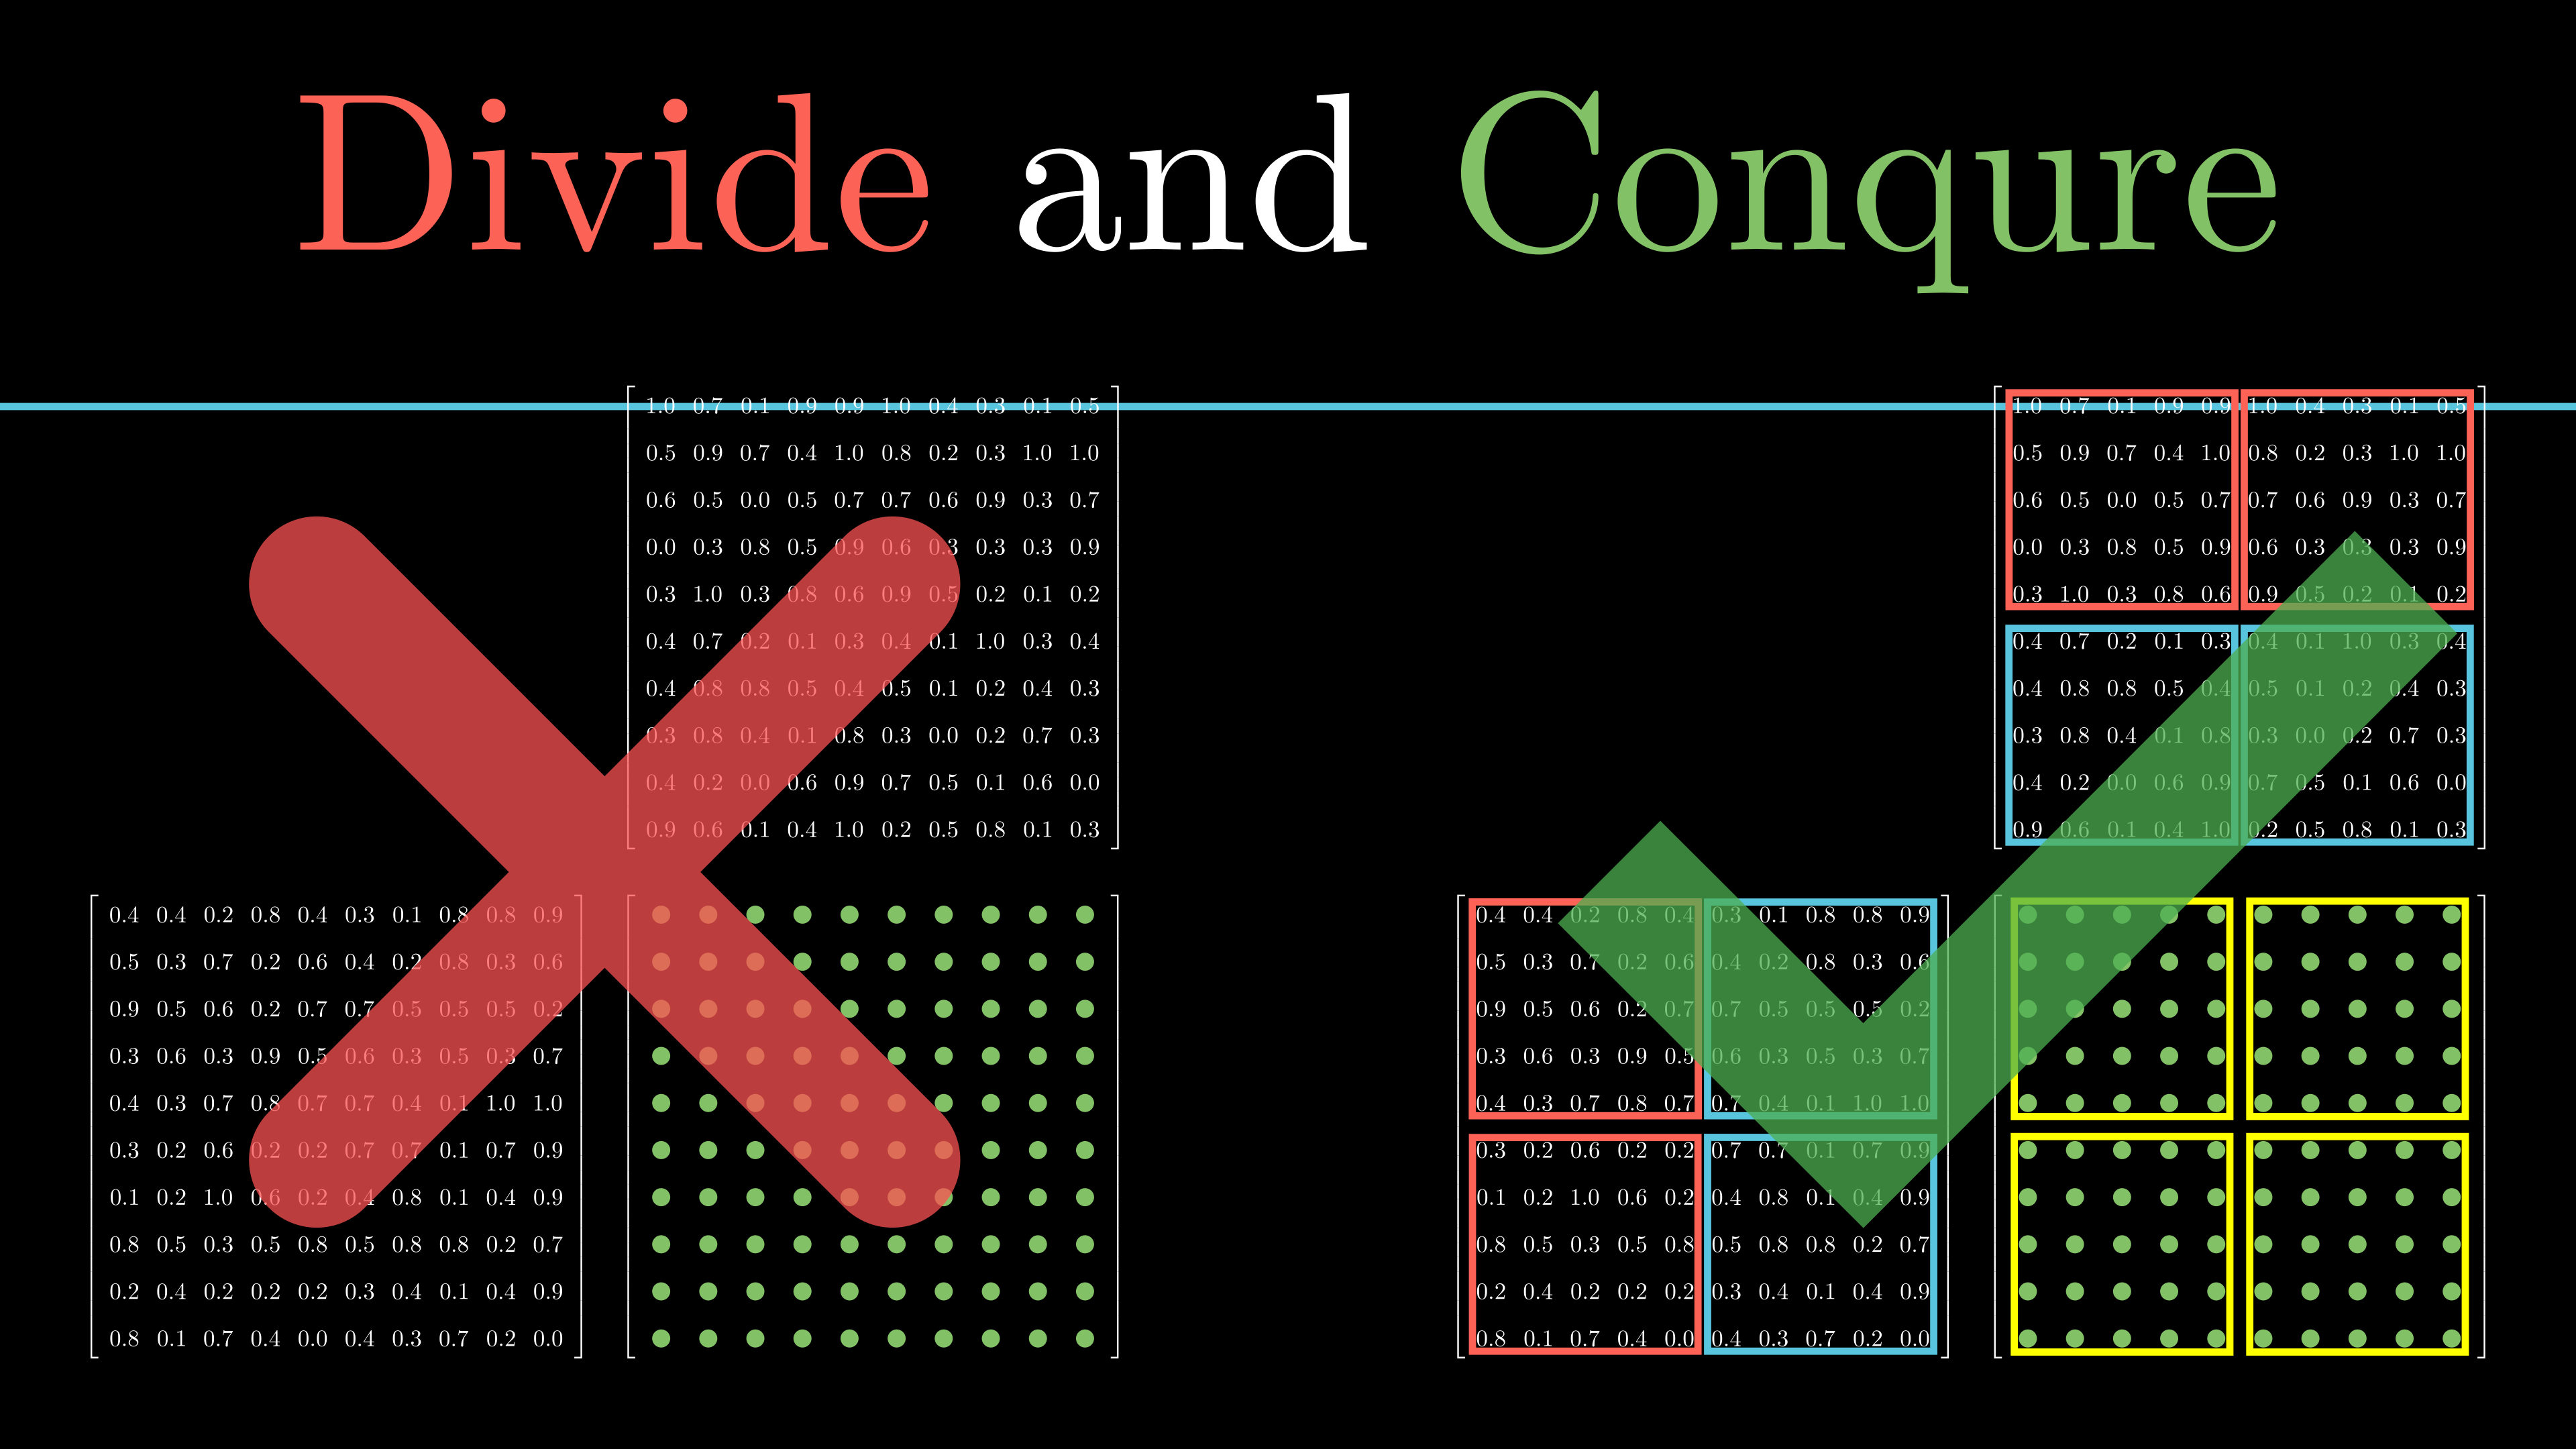

In [6]:
%%manim -qk -v WARNING Thumbnail

class Thumbnail(Scene):
    def construct(self):
        title = Title("Divide and Conqure").scale(2.5).to_edge(UP)
        title[0][:6].color = RED
        title[0][9:].color = GREEN
        title[1].color = BLUE

        C = Matrix(X1,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.26)

        A = Matrix(X0,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.26).next_to(C, LEFT)

        B = Matrix(W0,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.26).next_to(C, UP)

        VGroup(A, B, C).move_to(ORIGIN).to_edge(DOWN).to_edge(LEFT)

        threads = VGroup()
        for i in range(10):
            thread_row = VGroup()
            for j in range(10):
                thread_row.add(Dot(radius=0.05, color=GREEN).move_to(C.get_entries()[i*10+j]))
            threads.add(thread_row)


        C_ = Matrix(X1,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.26)

        A_ = Matrix(X0,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.26).next_to(C_, LEFT)

        B_ = Matrix(W0,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.26).next_to(C_, UP)

        VGroup(A_, B_, C_).move_to(ORIGIN).to_edge(DOWN).to_edge(RIGHT)

        threads_ = VGroup()
        for i in range(10):
            thread_row = VGroup()
            for j in range(10):
                thread_row.add(Dot(radius=0.05, color=GREEN).move_to(C_.get_entries()[i*10+j]))
            threads_.add(thread_row)

        blocks = VGroup(SurroundingRectangle(VGroup(threads_[0][:5], threads_[1][:5], threads_[2][:5], threads_[3][:5], threads_[4][:5]), buff=0.025, color=YELLOW),
                    SurroundingRectangle(VGroup(threads_[0][5:], threads_[1][5:], threads_[2][5:], threads_[3][5:], threads_[4][5:]), buff=0.025, color=YELLOW),
                    SurroundingRectangle(VGroup(threads_[5][:5], threads_[6][:5], threads_[7][:5], threads_[8][:5], threads_[9][:5]), buff=0.025, color=YELLOW),
                    SurroundingRectangle(VGroup(threads_[5][5:], threads_[6][5:], threads_[7][5:], threads_[8][5:], threads_[9][5:]), buff=0.025, color=YELLOW))

        tiles = VGroup(SurroundingRectangle(VGroup(A_.get_entries()[:5], A_.get_entries()[10:15], A_.get_entries()[20:25], A_.get_entries()[30:35], A_.get_entries()[40:45]), buff=0.025, color=RED),
                    SurroundingRectangle(VGroup(B_.get_entries()[:5], B_.get_entries()[10:15], B_.get_entries()[20:25], B_.get_entries()[30:35], B_.get_entries()[40:45]), buff=0.025, color=RED),
                    SurroundingRectangle(VGroup(A_.get_entries()[5:10], A_.get_entries()[15:20], A_.get_entries()[25:30], A_.get_entries()[35:40], A_.get_entries()[45:50]), buff=0.025, color=BLUE),
                    SurroundingRectangle(VGroup(B_.get_entries()[5:10], B_.get_entries()[15:20], B_.get_entries()[25:30], B_.get_entries()[35:40], B_.get_entries()[45:50]), buff=0.025, color=RED),
                    SurroundingRectangle(VGroup(A_.get_entries()[50:55], A_.get_entries()[60:65], A_.get_entries()[70:75], A_.get_entries()[80:85], A_.get_entries()[90:95]), buff=0.025, color=RED),
                    SurroundingRectangle(VGroup(B_.get_entries()[50:55], B_.get_entries()[60:65], B_.get_entries()[70:75], B_.get_entries()[80:85], B_.get_entries()[90:95]), buff=0.025, color=BLUE),
                    SurroundingRectangle(VGroup(A_.get_entries()[55:60], A_.get_entries()[65:70], A_.get_entries()[75:80], A_.get_entries()[85:90], A_.get_entries()[95:100]), buff=0.025, color=BLUE),
                    SurroundingRectangle(VGroup(B_.get_entries()[55:60], B_.get_entries()[65:70], B_.get_entries()[75:80], B_.get_entries()[85:90], B_.get_entries()[95:100]), buff=0.025, color=BLUE))

        checkmark = SVGMobject("checkmark.svg").scale(4).set_opacity(0.75).move_to(VGroup(A_, B_, C_))
        cross = SVGMobject("cross.svg").scale(2).set_opacity(0.75).move_to(VGroup(A, B, C))

        self.add(title, A, B, C[1:], threads, A_, B_, C_[1:], threads_, tiles, blocks, checkmark[1], cross)